#Proyecto final Minería de Datos
Integrantes: Álvaro Lara, Nicolás Herrera y Felipe Cabezas

Profesor: Robert Guaman

Ayudantes: Ariel Zúñiga y Nicolás Araya

In [ ]:
from google.colab import drive
import pandas as pd            # Librería para manejo de dataframes
import matplotlib.pyplot as plt  # Librería para visualizar datos
import numpy as np               # Librería para manejo de matrices
import math                      # Librería para términos matemáticos necesarios
from sklearn.preprocessing import StandardScaler
#Subir el archivo al almacenamieto de la sesión
data = pd.read_csv('/content/data_proyecto.csv',sep=',')
data

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,58,38,15,54,52,50,53,16,18,17


#Análisis descriptivo

                age     height_cm    weight_kgs  overall_rating     potential  \
count  17954.000000  17954.000000  17954.000000    17954.000000  17954.000000   
mean      25.565445    174.946921     75.301047       66.240169     71.430935   
std        4.705708     14.029449      7.083684        6.963730      6.131339   
min       17.000000    152.400000     49.900000       47.000000     48.000000   
25%       22.000000    154.940000     69.900000       62.000000     67.000000   
50%       25.000000    175.260000     74.800000       66.000000     71.000000   
75%       29.000000    185.420000     79.800000       71.000000     75.000000   
max       46.000000    205.740000    110.200000       94.000000     95.000000   

         value_euro      wage_euro  international_reputation(1-5)  \
count  1.769900e+04   17708.000000                   17954.000000   
mean   2.479280e+06    9902.134628                       1.111674   
std    5.687014e+06   21995.593750                       0.3921

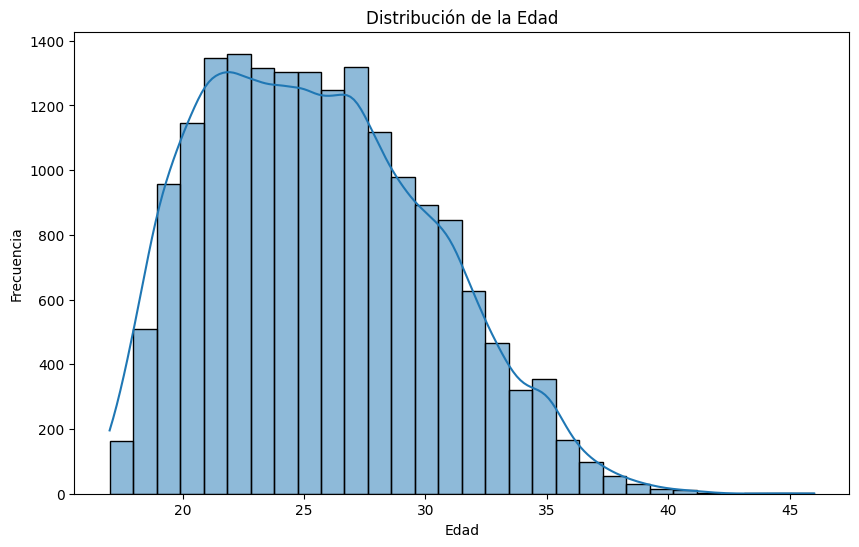

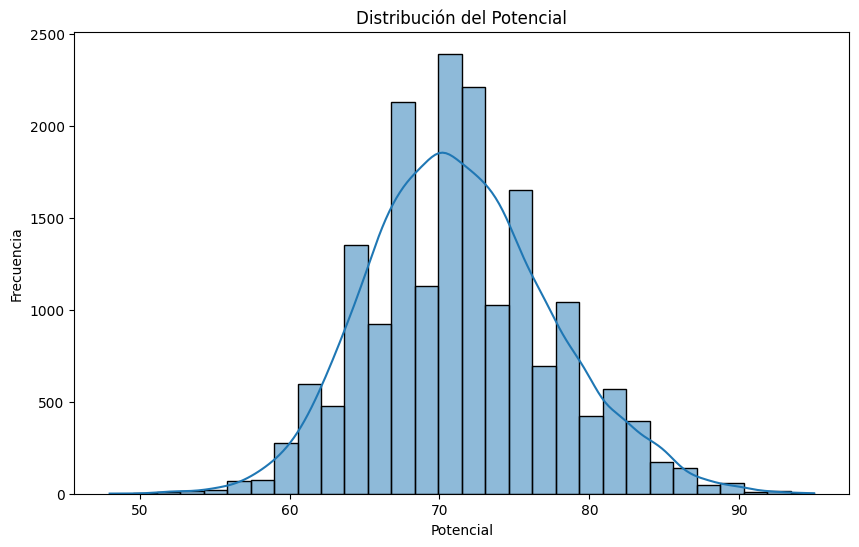

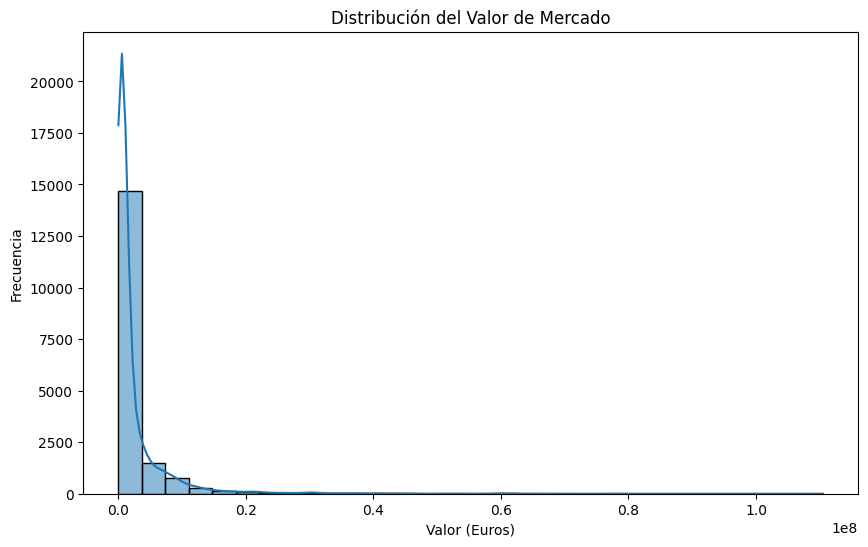

In [ ]:
import plotly.express as px

# Obtener estadísticas descriptivas
print(data.describe())

import matplotlib.pyplot as plt
import seaborn as sns

#Distribución de la edad de los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

#Distribución del potencial de los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data['potential'], bins=30, kde=True)
plt.title('Distribución del Potencial')
plt.xlabel('Potencial')
plt.ylabel('Frecuencia')
plt.show()

#Distribución del valor de mercado de los jugadores
plt.figure(figsize=(10, 6))
sns.histplot(data['value_euro'], bins=30, kde=True)
plt.title('Distribución del Valor de Mercado')
plt.xlabel('Valor (Euros)')
plt.ylabel('Frecuencia')
plt.show()

#Overall rating vs market value
fig_rating_value = px.scatter(data, x='overall_rating', y='value_euro', title='Overall Rating vs. Market Value', labels={'value_euro': 'Market Value (Euro)', 'overall_rating': 'Overall Rating'})
fig_rating_value.show()

#Preparación y limpieza de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix

#Se imputan valores faltantes con la media
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

#Se codifican los atributos categóricos para que puedan ser procesados
label_encoder = LabelEncoder()

categorical_columns = ['name', 'full_name', 'birth_date', 'positions', 'nationality',
                       'preferred_foot', 'body_type', 'national_team', 'national_team_position']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

#Discretizar la variable objetivo 'potential' en tres categorías
bins = [0, 60, 80, 100]
labels = ['Bajo', 'Medio', 'Alto']
data['potential_clase'] = pd.cut(data['potential'], bins=bins, labels=labels, include_lowest=True)

#Definir variable objetivo (potential_clase)
#Excluimos atributos que no son relevantes
X = data.drop(columns=['potential', 'potential_clase', 'name', 'full_name', 'birth_date'])
y = data['potential_clase']

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalizar los datos!!
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')

Tamaño del conjunto de entrenamiento: 14363
Tamaño del conjunto de prueba: 3591


#Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


#Redes Neuronales

In [ ]:
from sklearn.neural_network import MLPClassifier

rn_model = MLPClassifier(random_state=42, max_iter=1000)

rn_model.fit(X_train, y_train)

y_pred_rn = rn_model.predict(X_test)


#K-Means

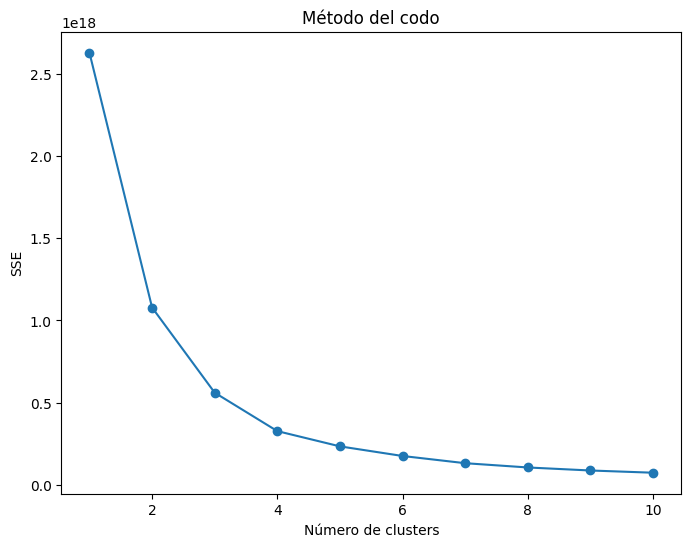

Silhouette Score: 0.8198604031066021


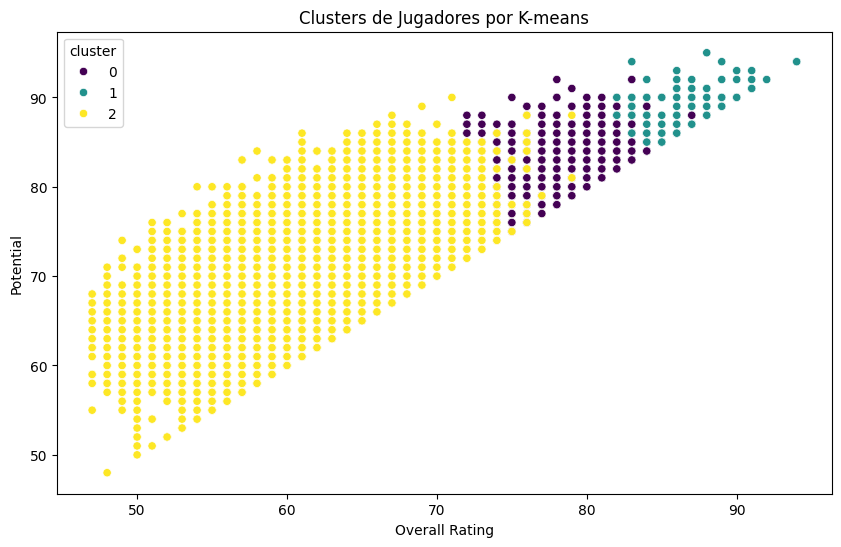

Conteo de jugadores según potencial predicho:
cluster
2    16410
0     1399
1      145
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar y ajustar el modelo KMeans
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_model.fit_predict(X)

# Calcular métricas de evaluación
inertia = kmeans_model.inertia_
silhouette_avg = silhouette_score(X, clusters)

# Método del codo para determinar el número óptimo de clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

print("Silhouette Score:", silhouette_avg)

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Añadir los clusters al DataFrame
data['cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_rating', y='potential', hue='cluster', data=data, palette='viridis')
plt.title('Clusters de Jugadores por K-means')
plt.xlabel('Overall Rating')
plt.ylabel('Potential')
plt.show()

cuantos_kmeans = data['cluster'].value_counts()
print("Conteo de jugadores según potencial predicho:")
print(cuantos_kmeans)


#Resultados algoritmos supervisados

              Modelo  Accuracy
0  Árbol de Decisión  0.961571
1                SVM  0.947925
2   Redes Neuronales  0.955444


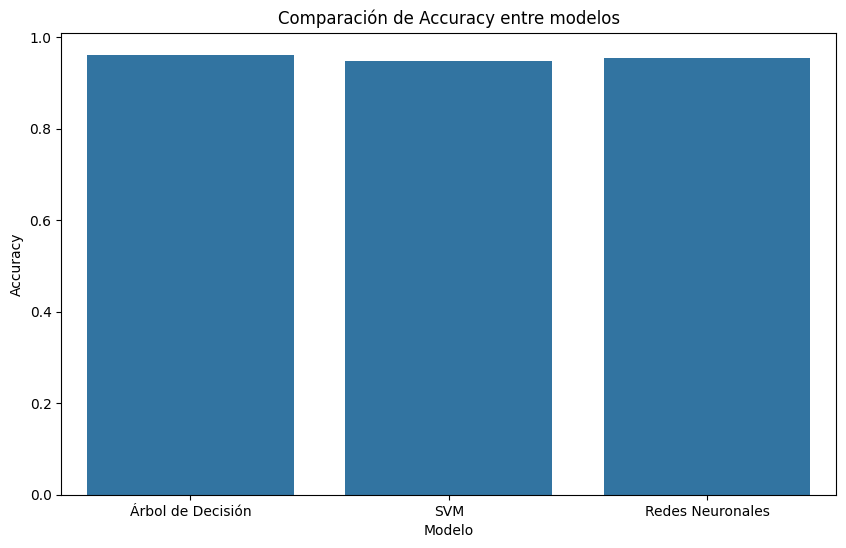

Resultados para Árbol de Decisión:
Accuracy: 0.9615705931495405
Precision: 0.9624543225088922
Recall: 0.9615705931495405
F1 Score: 0.961858929319521
Confusion Matrix:
 [[ 251    0   41]
 [   0   76   21]
 [  64   12 3126]]
Classification Report:
               precision    recall  f1-score   support

        Alto       0.80      0.86      0.83       292
        Bajo       0.86      0.78      0.82        97
       Medio       0.98      0.98      0.98      3202

    accuracy                           0.96      3591
   macro avg       0.88      0.87      0.88      3591
weighted avg       0.96      0.96      0.96      3591



Resultados para SVM:
Accuracy: 0.9479253689780005
Precision: 0.9488074026784765
Recall: 0.9479253689780005
F1 Score: 0.9387468429681608
Confusion Matrix:
 [[ 196    0   96]
 [   0   19   78]
 [  13    0 3189]]
Classification Report:
               precision    recall  f1-score   support

        Alto       0.94      0.67      0.78       292
        Bajo       1.00    

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Resultados
results = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'SVM', 'Redes Neuronales'],
    'Accuracy': [accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rn)]
})

print(results)

#Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Accuracy', data=results)
plt.title('Comparación de Accuracy entre modelos')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.show()

#Evaluar modelos
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Resultados para {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("\n")

#Evaluar cada modelo
evaluate_model(y_test, y_pred_tree, "Árbol de Decisión")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_rn, "Redes Neuronales")


#Mostramos de manera más clara las matrices de confusión

Resultados para Decision Tree:
              precision    recall  f1-score   support

        Alto       0.80      0.86      0.83       292
        Bajo       0.86      0.78      0.82        97
       Medio       0.98      0.98      0.98      3202

    accuracy                           0.96      3591
   macro avg       0.88      0.87      0.88      3591
weighted avg       0.96      0.96      0.96      3591



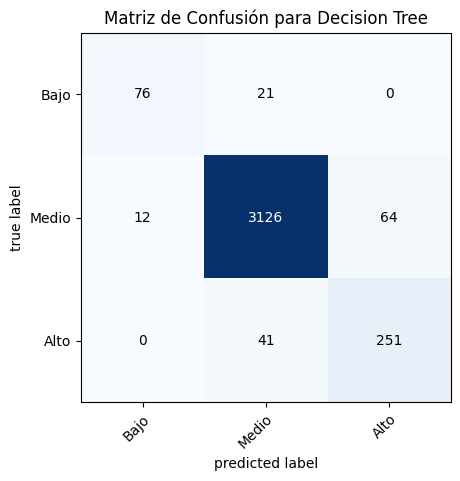

Resultados para SVM:
              precision    recall  f1-score   support

        Alto       0.94      0.67      0.78       292
        Bajo       1.00      0.20      0.33        97
       Medio       0.95      1.00      0.97      3202

    accuracy                           0.95      3591
   macro avg       0.96      0.62      0.69      3591
weighted avg       0.95      0.95      0.94      3591



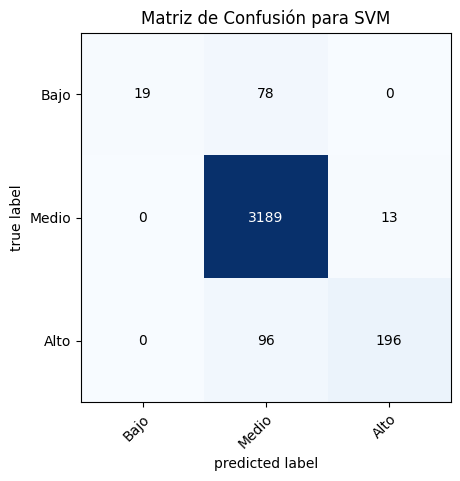

Resultados para Neural Network:
              precision    recall  f1-score   support

        Alto       0.82      0.78      0.80       292
        Bajo       0.72      0.62      0.67        97
       Medio       0.97      0.98      0.97      3202

    accuracy                           0.95      3591
   macro avg       0.84      0.79      0.81      3591
weighted avg       0.95      0.95      0.95      3591



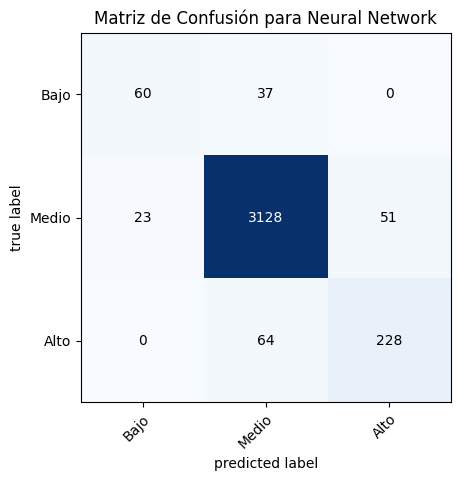

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Crear modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=200, random_state=42)
}

# Entrenar modelos y visualizar la matriz de confusión
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Mostrar reporte de clasificación
    print(f"Resultados para {model_name}:")
    print(classification_report(y_test, y_pred))

    # Crear y mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=['Bajo', 'Medio', 'Alto'])
    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=['Bajo', 'Medio', 'Alto'])
    plt.title(f"Matriz de Confusión para {model_name}")
    plt.show()


#Implementamos el algoritmo de Árbol de decisión, ya que fue el que tuvo mayor precisión

In [ ]:
#Entrenar el modelo de Árbol de Decisión con todos los datos
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)

#Predecir las categorías de potencial para todos los jugadores
data['predicción_potential_clase'] = tree_model.predict(X)

import joblib
joblib.dump(tree_model, 'decision_tree_model.pkl')

#Contar la cantidad de jugadores
cuantos_pred = data['predicción_potential_clase'].value_counts()
print("Conteo de jugadores según potencial predicho:")
print(cuantos_pred)

data

    name  potential potential_clase predicción_potential_clase
0   9536         94            Alto                       Alto
1   2446         89            Alto                       Alto
2  13031         91            Alto                       Alto
3   9421         88            Alto                       Alto
4   8675         91            Alto                       Alto
Conteo de jugadores por categoría de potencial predicha:
predicción_potential_clase
Medio    16066
Alto      1411
Bajo       477
Name: count, dtype: int64


,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,vision,penalties,composure,marking,standing_tackle,sliding_tackle,potential_clase,cluster,predicted_potential_clase,predicción_potential_clase
0,9536,9641,4372,31,170.18,72.1,214,6,94,94,...,94,75,96,33,28,26,Alto,1,Alto,Alto
1,2446,2744,2109,27,154.94,76.2,72,39,88,89,...,91,67,88,59,57,22,Alto,1,Alto,Alto
2,13031,13054,2641,25,190.50,83.9,228,53,88,91,...,88,82,87,63,67,67,Alto,1,Alto,Alto
3,9421,9679,4512,27,162.56,59.0,549,76,88,88,...,87,61,83,51,24,22,Alto,1,Alto,Alto
4,8675,8838,4310,27,187.96,88.9,104,126,88,91,...,49,33,80,91,88,87,Alto,1,Alto,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,13723,14051,1020,25,175.26,74.8,648,125,67,70,...,64,63,56,40,20,18,Medio,2,Medio,Medio
17950,11415,11548,2224,23,182.88,79.8,328,129,59,67,...,39,32,52,53,64,60,Medio,2,Medio,Medio
17951,6835,7150,3571,22,185.42,89.8,327,104,59,67,...,25,16,47,9,12,13,Medio,2,Medio,Medio
17952,100,150,4287,21,175.26,64.9,845,124,59,71,...,52,50,53,16,18,17,Medio,2,Medio,Medio
